#평가
- 정확도(accuracy)
- 오차행렬(Confusion Matrix)
- 정밀도(Precision)
- F1 스코어
- ROC AUC

## 파마 인디언 당뇨병 예측

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [14]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
def get_clf_eval(y_test, pred=None, pred_proba = None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  # ROC - AUC 추가
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차행렬')
  print(confusion)
  # ROC-AUC print 추가
  print(f'정확도:{accuracy}, 정밀도:{precision}, 재현율:{recall}, F1:{f1}, AUC:{roc_auc}')

In [16]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출.
# 맨 끝이 Outcome 칼럼으로 레이블 값임. 칼럼 위치 -1을 이용해 추출
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify = y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[88 12]
 [23 31]]
정확도:0.7727272727272727, 정밀도:0.7209302325581395, 재현율:0.5740740740740741, F1:0.6391752577319588, AUC:0.7918518518518518


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [17]:
def roc_curve_plot(y_test, pred_proba_c1):
  # 임계값이 다른 FPR, TPR 값을 반환받음
  fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
  # ROC 곡선을 그래프 곡선으로 그림.
  plt.plot(fprs, tprs, label = 'ROC')
  # 가운데 대각선 직선을 그림
  plt.plot([0,1], [0,1], 'k--', label = 'Random')

  # FPR X 축의 Scale을 0.1단위로 변경, X, Y축 명 설정등
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1), 2))
  plt.xlim(0,1); plt.ylim(0,1)
  plt.xlabel('FPR( 1- Sensitivity )'); plt.ylabel('TPR(Recall)')
  plt.legend()

In [18]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
  # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray추출.
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  # X축을 threshold값으로, Y축은 정밀도, 재현율값으로 각각 plot 수행, 정밀도는 점선으로 표시
  plt.figure(figsize = (8, 6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '--', label = 'precision')
  plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')

  # threshold 값 X 축의 Scale을 0.1 단위로 변경
  start, end = plt.xlim()

  # x축, y축 label과 legend, 그리고 grid설정
  plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
  plt.legend(); plt.grid()
  plt.show()

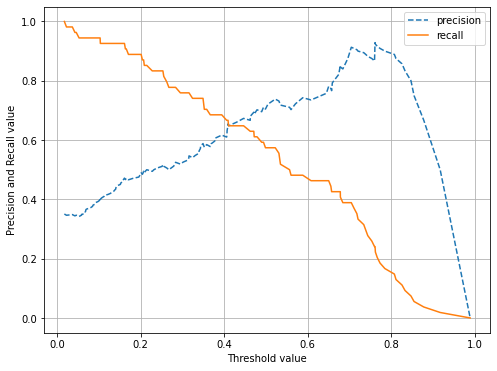

In [19]:
# 전체데이터의 65%가 Negative이므로 정확도보다는 재현율 성능에 더 초점을 맞춰보겠다.
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)


# 재현율 곡선을 보면 임계값을 0.42정도로 낮추면 정밀도와 재현율이 어느정도 균형을 맞출 것 같다. 하지만 두개의 지표 모두 0.7이 안되는 수치로 보인다.

In [20]:
diabetes_data.describe()

# min값이 0인곳이 상당히 많다.
# Glucose는 포도당 수치인데 min값이 0인것은 말이 되지 않는다.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [55]:
# min()값이 0으로 돼있는 피처에 대해 0값의 건수 및 전체 데이터 건수 대비 몇 퍼센트 비율로 존재하는지 확인해 보겠다.
# 확인할 피처는 'Glucose', 'Bloodpressure', 'SkinThickness', 'Insulin'

# 0값을 검사할 피처 명 리스트
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

# 피처별로 반복하면서 데이터 값이 0인 데이터 건수를 추출하고, 퍼센트 계산
for feature in zero_features:
  zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
  print(f'{feature} 0 건수는 {zero_count}, 퍼센트는 {100*zero_count/total_count}%')

Glucose 0 건수는 0, 퍼센트는 0.0%
BloodPressure 0 건수는 0, 퍼센트는 0.0%
SkinThickness 0 건수는 0, 퍼센트는 0.0%
Insulin 0 건수는 0, 퍼센트는 0.0%
BMI 0 건수는 0, 퍼센트는 0.0%


In [56]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, mean_zero_features)

# 위 피처들의 0값을 평균값으로 대체하는 과정이다

In [57]:
# 0값을 평균값으로 대체한 데이터 세트에 피처스케일링을 적용해 변환하겠다. 로지스틱 회귀의 경우
# 일반적으로 숫자 데이터에 스케일링을 적용하는 것이 좋다. 

X = diabetes_data.iloc[:, :-1]  # Outcome열 제외킨것
y = diabetes_data.iloc[:, -1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행.
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

# 재현율 수치는 개선이 필요할거 같다.

오차행렬
[[90 10]
 [21 33]]
정확도:0.7987012987012987, 정밀도:0.7674418604651163, 재현율:0.6111111111111112, F1:0.6804123711340206, AUC:0.8433333333333334


In [58]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
  # threshold list객체 내의 값을 차례로 iteration하면서 Evaluation 수행
  for custom_threshold in thresholds:
    binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
    custom_predict = binarizer.transform(pred_proba_c1)
    print('임계값:', custom_threshold)
    get_clf_eval(y_test, custom_predict)

In [59]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임계값: 0.3


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:546: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_score = check_array(y_score, ensure_2d=False)


ValueError: ignored

In [66]:
# 위 오류가 안떳다면 임계값 0.48이 최적값임
binarizer = Binarizer(threshold = 0.48)

# 위에서 구한 lr_clf의 predict_proba() 예측 확률 array에서 1에 해당하는 칼럼값을 Binarizer 변환

pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1, 1))

get_clf_eval(y_test, pred_th_048, pred_proba[:, 1])

오차행렬
[[88 12]
 [19 35]]
정확도:0.7987012987012987, 정밀도:0.7446808510638298, 재현율:0.6481481481481481, F1:0.6930693069306931, AUC:0.8433333333333334


## 정리
- 이빈 분류의 레이블 값이 불균형하게 분포될 경우 단순히 예측 결과와 실제 결과가 일치하는 지표인 정확도만으로는 머신러닝 모델의 에측 성능을 평가할 수 없다.